<a href="https://colab.research.google.com/github/yonatanlou/study_projects/blob/main/Statistics_lab/labs/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Israel Elections Data Analysis**
## Assignment 1

*by: Eitan.Zimmerman, Matan.Polke, Yonatan.Lourie*


### Collecting the data

In [ ]:
# Import modules 
import numpy as np
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns
import matplotlib.pyplot as plt

pd.get_option("display.max_columns")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0

For easy collaboration, we decided the read to file from the [web](https://github.com/yonatanlou/study_projects/blob/main/Statistical_learning_and_data%20analysis/votes_per_city_2021.csv).

In [ ]:
data_url = "https://raw.githubusercontent.com/yonatanlou/study_projects/main/Statistical_learning_and_data%20analysis/votes_per_city_2021.csv"
df_2021_raw = pd.read_csv(data_url, encoding = 'iso-8859-8', index_col='שם ישוב')
df_2021_raw.head()

,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת,Unnamed: 46
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,6,1220,221,151,1,150,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8,NaN
אדירים,5,113,234,180,0,180,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6,NaN
אושה,8,278,382,276,0,276,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,NaN
אחווה,17,1157,183,145,0,145,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,NaN
איבים,17,338,138,40,0,40,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,NaN


#### Data cleaning

In [ ]:
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
print("{} votes in March 2020".format(df_2021_raw['כשרים']['מעטפות חיצוניות']) + ' מעטפות חיצוניות ')

421619 votes in March 2020 מעטפות חיצוניות 


In [ ]:
print(df_2021_raw.columns)
df_2021.head()

Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ב',
       'ג', 'ודעם', 'ז', 'זץ', 'ט', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כך', 'כן', 'ל', 'מחל', 'מרצ', 'נ', 'ני', 'נר', 'עם', 'פה', 'ףז', 'צי',
       'צכ', 'צף', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'ר', 'רנ', 'רף', 'רק', 'שס',
       'ת', 'Unnamed: 46'],
      dtype='object')


,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8
אדירים,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6
אושה,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15
אחווה,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8
איבים,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_2021.describe()


,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.00000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.0,1215.000000,1215.000000
mean,221.207407,225.379424,204.437037,174.965432,0.325103,0.545679,185.712757,0.667490,28.710288,0.335802,0.161317,0.353086,0.210700,0.364609,1.062551,240.540741,204.419753,878.100412,166.434568,0.40000,0.353086,0.181070,137.501235,505.441975,1.077366,0.362963,0.208230,0.186008,0.316872,0.381070,0.325103,0.423045,0.600000,14.276543,0.978601,0.487243,0.0,260.088889,172.148971
std,1630.890978,1448.009636,2434.859254,924.732474,2.898415,3.250803,1149.958744,4.141412,169.416802,1.836611,1.077852,2.309911,1.226446,2.641308,5.867514,1420.368827,1282.323553,4842.233477,1314.651320,3.15962,2.363145,1.460113,677.210580,3064.015473,14.734630,2.696775,1.443133,1.226412,2.452683,3.373333,2.498201,2.369937,3.680126,72.194177,5.682239,3.259450,0.0,1759.336035,983.868998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.500000,22.000000,4.000000,0.00000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,7.000000
50%,36.000000,19.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,7.000000,60.000000,23.000000,0.00000,0.000000,0.000000,0.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,3.000000,16.000000
75%,92.000000,49.000000,3.000000,3.000000,0.000000,0.000000,42.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,16.000000,161.000000,68.000000,0.00000,0.000000,0.000000,0.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.0,24.000000,31.500000
max,38780.000000,39693.000000,58585.000000,14632.000000,88.000000,93.000000,27130.000000,82.000000,3876.000000,41.000000,28.000000,46.000000,30.000000,69.000000,105.000000,28301.000000,27483.000000,103036.000000,36739.000000,95.00000,58.000000,44.000000,10626.000000,58019.000000,501.000000,79.000000,43.000000,34.000000,69.000000,106.000000,77.000000,59.000000,101.000000,1303.000000,144.000000,77.000000,0.0,39151.000000,22077.000000


In [ ]:
# df_2021.reset_index(inplace=True)
df_2021.style.set_properties(**{'text-align': 'left'})
df_2021.head()

,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8
אדירים,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6
אושה,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15
אחווה,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8
איבים,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_2021_raw.head()

,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת,Unnamed: 46
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,6,1220,221,151,1,150,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8,NaN
אדירים,5,113,234,180,0,180,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6,NaN
אושה,8,278,382,276,0,276,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,NaN
אחווה,17,1157,183,145,0,145,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,NaN
איבים,17,338,138,40,0,40,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,NaN


## 1.

In [ ]:
df_2021_raw['invalVoice_proportion'] = df_2021_raw["פסולים"]/df_2021_raw["מצביעים"]
#There is no city with zero voters so we will not get an ZeroDivisionError: division by zero.

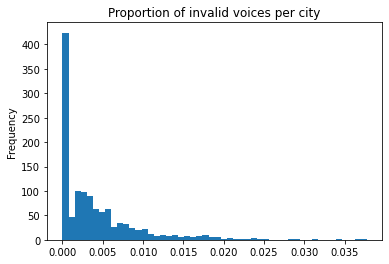

In [ ]:
df_2021_raw.invalVoice_proportion.plot.hist(bins=50, title="Proportion of invalid voices per city")

We can see that most of cities are concentrated in 0%-5%, when the majority of the cities are with 0% of the Proportion of invalid voices.

Note: this is the proportion per city, but we are not taking in account the **size** of the city.

In [ ]:
df_2021_raw.invalVoice_proportion.sort_values(ascending=False)[0:3]

שם ישוב
סואעד חמרייה    0.037736
ניין            0.036486
מאיר שפיה       0.034483
Name: invalVoice_proportion, dtype: float64

We can see that the 3 top cities with the highest proportion are: סואעד חמרייה, ניין ומאיר שפיה.

## 2.

First, we will create the main functions for the plotting:

In [ ]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]
  


In [ ]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar(df, thresh, cityA, cityB):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()
    
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    cityA_votes = df.loc[cityA,names] / df.loc[cityA,names].sum()
    cityB_votes = df.loc[cityB,names] / df.loc[cityB,names].sum()
    cityA_bar = ax.bar(np.arange(n), list(cityA_votes), width, color='r')
    cityB_bar = ax.bar(np.arange(n)+width, list(cityB_votes), width, color='b')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title(f'Votes percent per party 2019 - {cityA[::-1]} vs {cityB[::-1]}')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((cityA_bar[0], cityB_bar[0]), (cityB[::-1], cityA[::-1]))
    plt.show()

    return fig, ax



Next, we will give a label for each city by the city population (**Big**, **Medium** or **Small**).

In [ ]:
def population_divider(voters):
  if voters >= 50000:
    return "Big"
  elif voters >= 5000:
    return "Medium"
  else:
    return "Small"

df_2021_raw["pop_size"] = df_2021_raw["מצביעים"].apply(lambda score: population_divider(score))


Now we will make a function that generate two cities by size.


In [ ]:
def pair_city_generator(size, n):
  cities = df_2021_raw[df_2021_raw.pop_size == size].sample(n, random_state=42).index.to_list()
  return cities



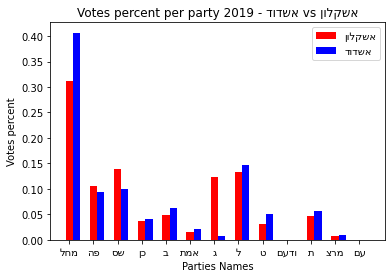

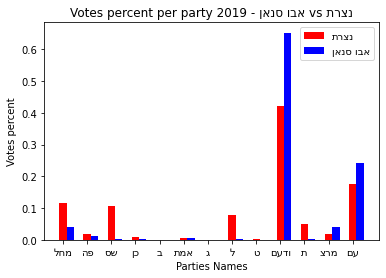

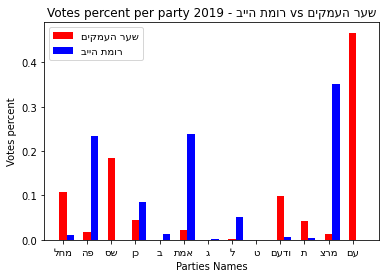

In [ ]:
sizes = ["Big", "Medium", "Small"]
for size in sizes:
  cities = pair_city_generator(size, 2)
  party_bar(df_2021, 0.0325, cities[0], cities[1])


**Big cities** - <u>comparison between 
Ashkelon and Ashdod </u>

In a matter of fact, alot of people find Ashkelon and Ashdod pretty similar (due to location, the cities name both of them near the beach etc..). 

The biggest difference that we can observed is that in Ashkelon we have more votes of "Yehadut Hatora" parity.
We can also observe that Ashdod have more vote for the "Likud" parity.
In the other parities the data is pretty similar.

---
**Medium cities** - <u>comparison between 
Nazareth and Abu Snan </u>

The main difference we can see is that Abu Snan voters is much more concentrated with a few arab parties (mainly Hameuhedet and Hameshutefet).
In Nazareth we can see that the votes are more distributes and we have also votes for jewish parties (Likud, Yehadut Hatora and Shas).

---
**Small cities** - <u>comparison between 
Shaar Haamakin and Rumat al-Heib  </u>(will be called Rumat)
Here we can see differentially in almost every one of the parties which probably caused by the nature of the population in each city.
We can observed that there is only one party where the votes of both of the cities less different (Yesh Atid).



## 3. 

Let $p=[p_1,p_2,...,p_n],q=[q_1,q_2,...,q_n]  $

And let the square distance to be: $d(p,q) = (p_1-q_1)^2+...+(p_n-q_n)^2$

In [ ]:
total_votes  = df_2021.sum().div(df_2021.sum().sum())
total_votes #The vote distribution of israel by parties


אמת     0.060944
ב       0.062094
ג       0.056324
ודעם    0.048204
ז       0.000090
זץ      0.000150
ט       0.051165
י       0.000184
יז      0.007910
ינ      0.000093
יף      0.000044
יק      0.000097
יר      0.000058
כ       0.000100
כך      0.000293
כן      0.066271
ל       0.056319
מחל     0.241923
מרצ     0.045854
נ       0.000110
ני      0.000097
נר      0.000050
עם      0.037883
פה      0.139253
ףז      0.000297
צי      0.000100
צכ      0.000057
צף      0.000051
ץ       0.000087
ק       0.000105
קי      0.000090
קך      0.000117
קץ      0.000165
ר       0.003933
רנ      0.000270
רף      0.000134
רק      0.000000
שס      0.071656
ת       0.047428
dtype: float64

In [ ]:
def distance(r,total_votes):
    r = r.div(r.sum()) #calculate the proprtion of each party in each city
    dist = (r-total_votes)**2
    return dist.sum()


results = df_2021.apply(lambda row: distance(row[:], total_votes), axis=1).sort_values()
results

שם ישוב
מעטפות חיצוניות     0.003485
רחובות              0.006598
פתח תקווה           0.008164
חיפה                0.010974
ראש העין            0.013163
                      ...   
אום בטין            0.872246
קוממיות             0.885214
מסעודין אלעזאזמה    0.922783
נווה                0.959133
ביר הדאג            0.961703
Length: 1215, dtype: float64

Recall that מעטפות חיצוניות is the votes of the soldiers, prisoners, diplomats, etc...
Ineresting to see that this is the ost similar to the original distribution, but this is for another subject...

As for the cities, we can that Rehovot and Petach Tikva are the most similar.

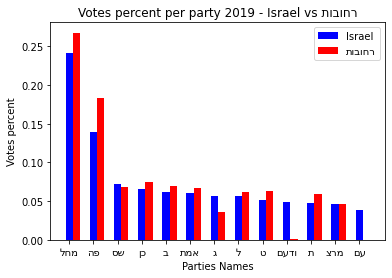

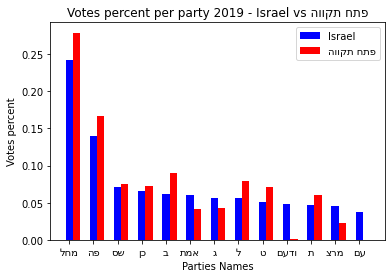

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe386e84550>)

In [ ]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar(df, thresh, city):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city_votes = df.loc[city,names] / df.loc[city,names].sum()
    all_bar = ax.bar(np.arange(n), list(votes), width, color='b')
    city_bar = ax.bar(np.arange(n)+width, list(city_votes), width, color='r')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title(f'Votes percent per party 2019 - Israel vs {city[::-1]}')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', city[::-1]))
    plt.show()

    return fig, ax


party_bar(df_2021, 0.0325, 'רחובות')
party_bar(df_2021, 0.0325, 'פתח תקווה')

We can see that indeed the differnce between all Israel and each city is not high.

We can also observe that Haifa is the only city from the top 3 that have similiarity to Israel with Hareshima Hameshutefet. Thats because in Haifa living more Arabs from Petach Tikva and Rehovot.

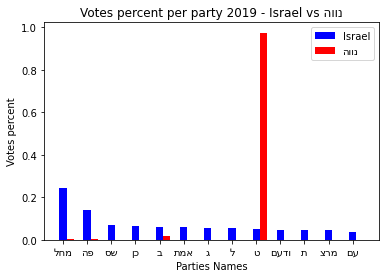

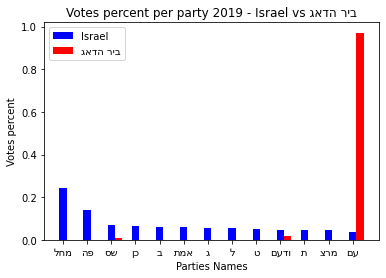

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe386d02ad0>)

In [ ]:
party_bar(df_2021, 0.0325, 'נווה')
party_bar(df_2021, 0.0325, 'ביר הדאג')

We can see here very clearly that the common in both of the cities is that the votes are concentrated in one party (Bir Hadj with עם, and Nave with ט.
This is causing the. distance function to be very "far" from the complete israel voting.